Import the necessary libraries
- numpy for reading image data
- PIL for bilinear interpolation
- glob to retrieve cat image file names

In [91]:
import numpy as np
from PIL import Image
import glob
import matplotlib.pyplot as plt

<h2>Question 1.1</h2>

Obtain Data From the File

In [92]:
# Load the images and resize them to 64x64 pixels
image_paths = glob.glob('afhq_cat/*.jpg')
print('Number of images found: ', len(image_paths))
images = []
for path in image_paths:
  img = Image.open(path)
  img = img.resize((64, 64), resample=Image.BILINEAR)
  images.append(np.asarray(img))

# Flatten each image to a 4096x3 matrix
flattened_images = []
for img in images:
  flattened_images.append(img.reshape(4096, 3))

# Stack all the flattened matrices to create a 3D array
X = np.stack(flattened_images, axis=0)
X = X.astype(np.float32)
print(X.shape)

# Slice X to obtain color channel matrices
X_red = X[:, :, 0]
X_green = X[:, :, 1]
X_blue = X[:, :, 2]

Number of images found:  5653


/var/folders/fc/dd9ss7ws7p729yzyzmtqpdqr0000gn/T/ipykernel_41324/475942055.py:7: DeprecationWarning: BILINEAR is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.BILINEAR instead.
  img = img.resize((64, 64), resample=Image.BILINEAR)


(5653, 4096, 3)


In [93]:
# Perform PCA on each color channel matrix (Gets the first 10 principal components)
def pca(X):
    mean = np.mean(X, axis=0)
    # Center the data
    X = X - mean
    # Calculate the covariance matrix
    cov = np.cov(X, rowvar=False)
    # Calculate the eigenvalues and eigenvectors of the covariance matrix
    eigvals, eigvecs = np.linalg.eig(cov)
    # Sort the eigenvalues in descending order
    idx = np.argsort(eigvals)[::-1]
    eigvals_sorted, eigvecs_sorted = eigvals[idx], eigvecs[:, idx]
    # Select the first n eigenvectors (n is desired dimension
    # of rescaled data array, or dims_rescaled_data)
    # eigvecs_sorted = eigvecs_sorted[:, :n_components]
    # Carry out the transformation on the data using eigenvectors
    # and return the re-scaled data, eigenvalues, and eigenvectors
    explained_variance_ratio = [i/np.sum(eigvals) for i in eigvals_sorted]

    return explained_variance_ratio, eigvals_sorted, eigvecs_sorted, mean, eigvecs, eigvals 

Find the eigenvalues, eigenvectors and evc for each channel

In [94]:
# Perform PCA on each color channel matrix and obtain the first 10 principal components
pve_red, eigvals_red, eigvecs_red, mean_red, _, _ = pca(X_red)
pve_blue, eigvals_green, eigvecs_green, mean_green, _, _ = pca(X_green)
pve_green, eigvals_blue, eigvecs_blue, mean_blue, _, _ = pca(X_blue)

Report the PVE for the first 10 X_i for each channel

In [95]:
# Report the PVE for each of the principal components and their sum for each X_i
print(f"Red channel PVE sum for the first 10 principal components:")
for i in range(1, 11):
  print(f"Principal component {i}: {np.sum(pve_red[:i])}")

Red channel PVE sum for the first 10 principal components:
Principal component 1: 0.2350696993650973
Principal component 2: 0.3915808514223919
Principal component 3: 0.48163338999534244
Principal component 4: 0.5499329368273457
Principal component 5: 0.5874602763381437
Principal component 6: 0.6114078154737781
Principal component 7: 0.6341724742528841
Principal component 8: 0.6553006837195982
Principal component 9: 0.6732366043040807
Principal component 10: 0.6867302133532457


In [96]:
# Report the PVE for each of the principal components and their sum for each X_i
print(f"Green channel PVE sum for the first 10 principal components:")
for i in range(1, 11):
  print(f"Principal component {i}: {np.sum(pve_green[:i])}")

Green channel PVE sum for the first 10 principal components:
Principal component 1: 0.22859035905368352
Principal component 2: 0.38508293832611074
Principal component 3: 0.4729888940831668
Principal component 4: 0.5350243758269491
Principal component 5: 0.5724257178602572
Principal component 6: 0.5965915917203778
Principal component 7: 0.6206389256874243
Principal component 8: 0.6412350602788931
Principal component 9: 0.6596940546392752
Principal component 10: 0.6739797747077685


In [97]:
# Report the PVE for each of the principal components and their sum for each X_i
print(f"Blue channel PVE sum for the first 10 principal components:")
for i in range(1, 11):
  print(f"Principal component {i}: {np.sum(pve_blue[:i])}")

Blue channel PVE sum for the first 10 principal components:
Principal component 1: 0.2087371485475201
Principal component 2: 0.36758280817282707
Principal component 3: 0.46017137679920705
Principal component 4: 0.5282824942617058
Principal component 5: 0.5662675470195494
Principal component 6: 0.5907348644687901
Principal component 7: 0.615014027883697
Principal component 8: 0.6365045561464204
Principal component 9: 0.6553745590486495
Principal component 10: 0.6695858942544113


Find the minimum number of principal components that are required to obtain at least 70% PVE for all channels.

In [98]:
# Find the minimum number of principal components required to obtain at least 70% PVE for all channels
min_components = 1
while True:
    red_pve_sum = np.sum(pve_red[:min_components])
    green_pve_sum = np.sum(pve_green[:min_components])
    blue_pve_sum = np.sum(pve_blue[:min_components])
    if red_pve_sum >= 0.7 and green_pve_sum >= 0.7 and blue_pve_sum >= 0.7:
        break
    min_components += 1

print(f"Minimum number of principal components required to obtain at least 70% PVE for all channels: {min_components}")

Minimum number of principal components required to obtain at least 70% PVE for all channels: 13


In [99]:
# Report the PVE for each of the principal components and their sum for each X_i
print(f"Red channel PVE for the principal components:")
for i in range(11, 15):
  print(f"Principal component {i}: {np.sum(pve_red[:i])}")
# Report the PVE for each of the principal components and their sum for each X_i
print(f"Green channel PVE for the principal components:")
for i in range(11, 15):
  print(f"Principal component {i}: {np.sum(pve_green[:i])}")
# Report the PVE for each of the principal components and their sum for each X_i
print(f"Blue channel PVE for the principal components:")
for i in range(11, 15):
  print(f"Principal component {i}: {np.sum(pve_blue[:i])}")


Red channel PVE for the principal components:
Principal component 11: 0.6981816476502414
Principal component 12: 0.7081842760520995
Principal component 13: 0.71788997208389
Principal component 14: 0.7266976985389427
Green channel PVE for the principal components:
Principal component 11: 0.6856969305285905
Principal component 12: 0.6959232719754039
Principal component 13: 0.7057291119296866
Principal component 14: 0.7150642607684055
Blue channel PVE for the principal components:
Principal component 11: 0.6811286368261021
Principal component 12: 0.6913055152453241
Principal component 13: 0.7012453873716817
Principal component 14: 0.7105624353635005


<h2>Question 1.2</h2>

In [100]:
def normalize(X):
  norm =[]
  for x in X:
    norm.append((x - np.min(X)) / (np.max(X)- np.min(X)))
  return norm

def reconstruct(X, eigvecs, mean, n_components,index):
  proj = np.dot(X[index,:], eigvecs[:,:n_components]) 
  tmp = np.dot(proj, eigvecs[:,:n_components].T)
  return tmp + mean

(4096, 4096)


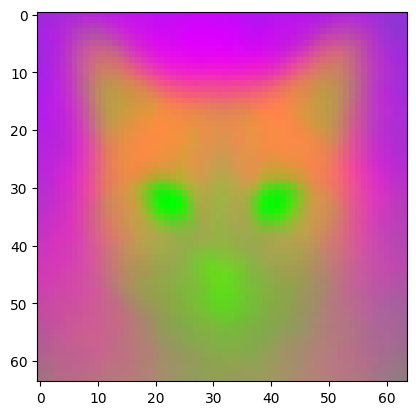

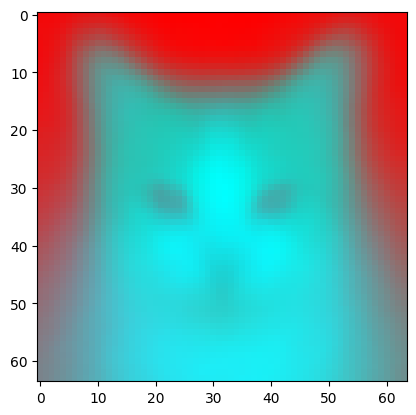

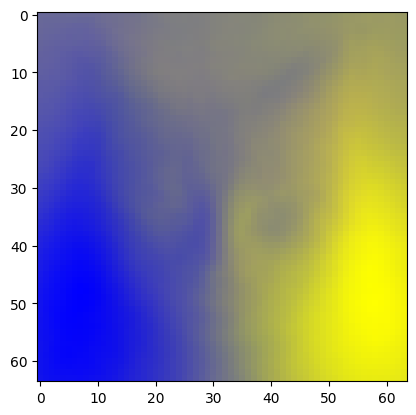

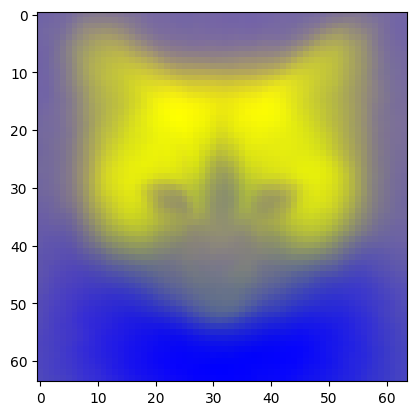

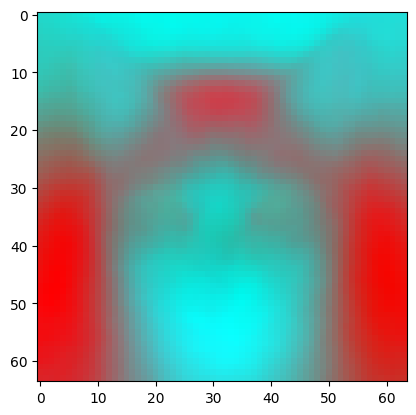

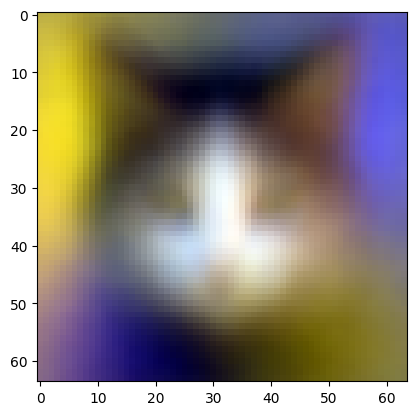

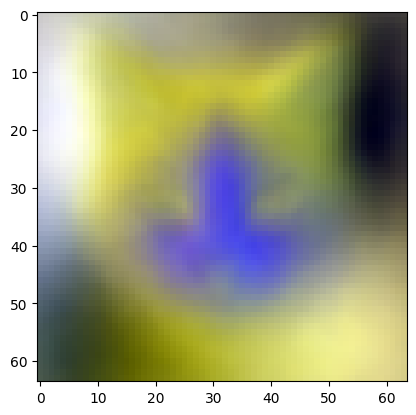

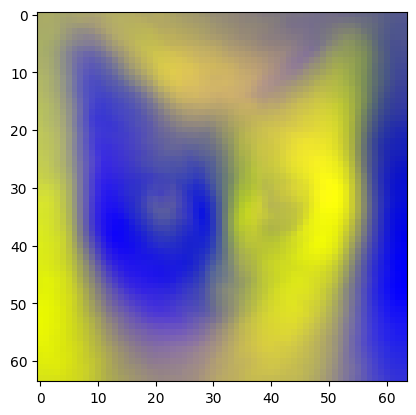

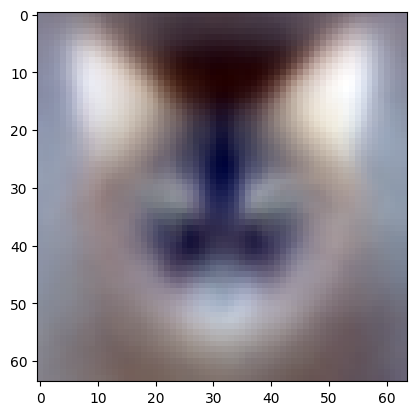

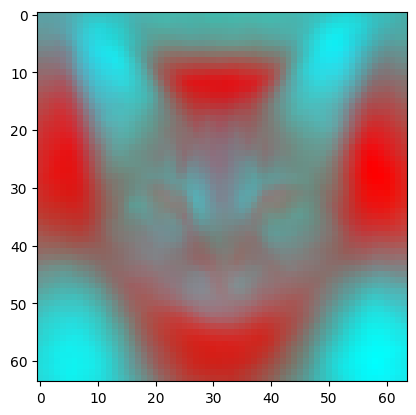

In [101]:
print(eigvecs_blue.shape)
blue = eigvecs_blue[:, :10].T.reshape(10,64,64)
green = eigvecs_green[:, :10].T.reshape(10,64,64)
red = eigvecs_red[:, :10].T.reshape(10,64,64)

red_norm = []
green_norm = []
blue_norm = []

for i in range(10):
    red_norm.append(normalize(red[i]))
    green_norm.append(normalize(green[i]))
    blue_norm.append(normalize(blue[i]))

for i in range(10):
    plt.imshow(np.dstack((red_norm[i], green_norm[i], blue_norm[i])))
    plt.show()

<h2>
  Question 1.3
</h2>

For k = 1 :


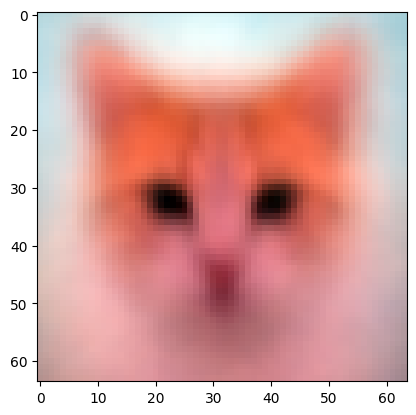

For k = 50 :


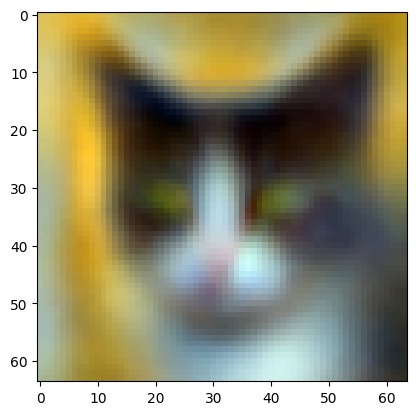

For k = 250 :


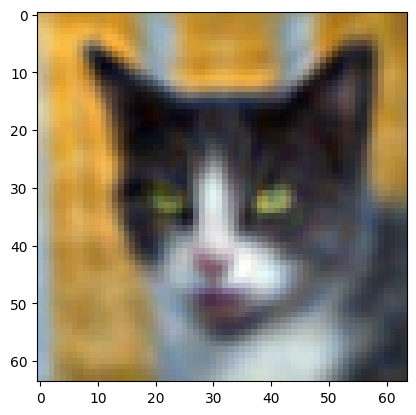

For k = 500 :


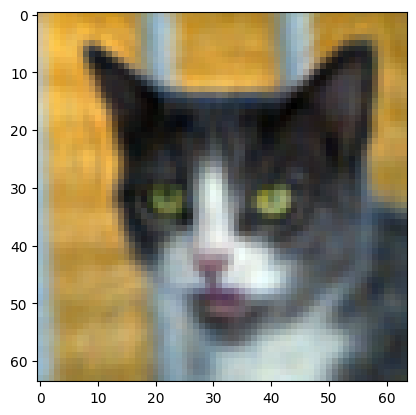

For k = 1000 :


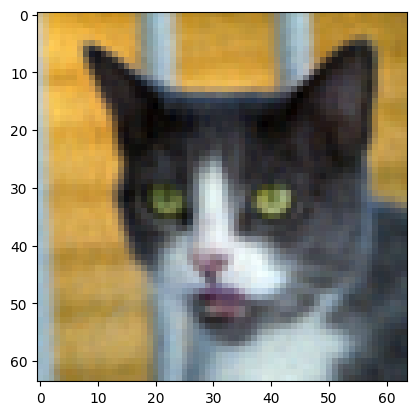

For k = 4096 :


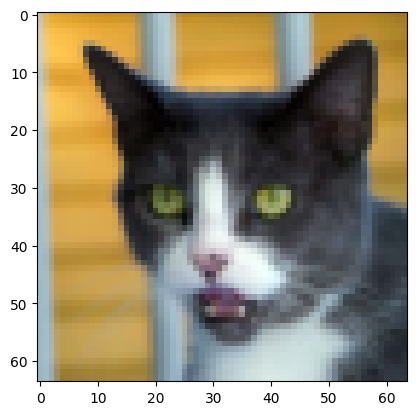

In [102]:
FILENAME = 'afhq_cat/flickr_cat_000003.jpg'

for i in range(len(image_paths)):
  if image_paths[i] == FILENAME:
    the_index = i
    break

k_values = [1, 50, 250, 500, 1000, 4096]

for k in k_values:
  print('For k =', k, ':')
  red_rct = normalize(reconstruct(X_red, eigvecs_red, mean_red, k, the_index))
  green_rct = normalize(reconstruct(X_green, eigvecs_green, mean_green, k, the_index))
  blue_rct = normalize(reconstruct(X_blue, eigvecs_blue, mean_blue, k, the_index))

  plt.imshow(np.dstack((red_rct, green_rct, blue_rct)).reshape(64,64,3))
  plt.show()
